In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Documents\Hair_Tracker_AI\Datasets_All\Hair_Fall\hair_loss.csv')

df.head()

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
0,312,100,14,249,87,55,333,44,41,368,4
1,52,207,3,425,387,1,182,26,65,41,1
2,170,197,11,140,199,91,414,30,54,90,4
3,256,334,19,358,120,3,35,48,45,65,2
4,309,185,58,207,329,301,345,23,90,346,4


In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['hair_fall'].unique()

array([4, 1, 2, 5, 0, 3], dtype=int64)

In [5]:
df.columns

Index(['total_protein', 'total_keratine', 'hair_texture', 'vitamin',
       'manganese', 'iron', 'calcium', 'body_water_content', 'stress_level',
       'liver_data', 'hair_fall'],
      dtype='object')

In [6]:
df.dtypes

total_protein         int64
total_keratine        int64
hair_texture          int64
vitamin               int64
manganese             int64
iron                  int64
calcium               int64
body_water_content    int64
stress_level          int64
liver_data            int64
hair_fall             int64
dtype: object

In [7]:
df=df.dropna()
print(df.isnull().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

total_protein         0
total_keratine        0
hair_texture          0
vitamin               0
manganese             0
iron                  0
calcium               0
body_water_content    0
stress_level          0
liver_data            0
hair_fall             0
dtype: int64
0


In [8]:
df.shape

(100000, 11)

In [9]:
X = df.drop('hair_fall', axis=1)
y = df['hair_fall']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

              Feature  Importance
5                iron    0.103021
3             vitamin    0.102952
0       total_protein    0.102555
4           manganese    0.102541
9          liver_data    0.102434
6             calcium    0.102429
1      total_keratine    0.101811
7  body_water_content    0.094712
8        stress_level    0.094490
2        hair_texture    0.093057


In [20]:
threshold = 0.1  
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']
X_filtered = X[important_features]
print(X_filtered.columns)

Index(['iron', 'vitamin', 'total_protein', 'manganese', 'liver_data',
       'calcium', 'total_keratine'],
      dtype='object')


In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_filtered, y, test_size=0.2, random_state=42)
model1 = RandomForestClassifier(bootstrap=False, max_depth=30, max_features=None,min_samples_leaf=2, min_samples_split=5,n_estimators=200)
model1.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=False, max_depth=30, max_features=None,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

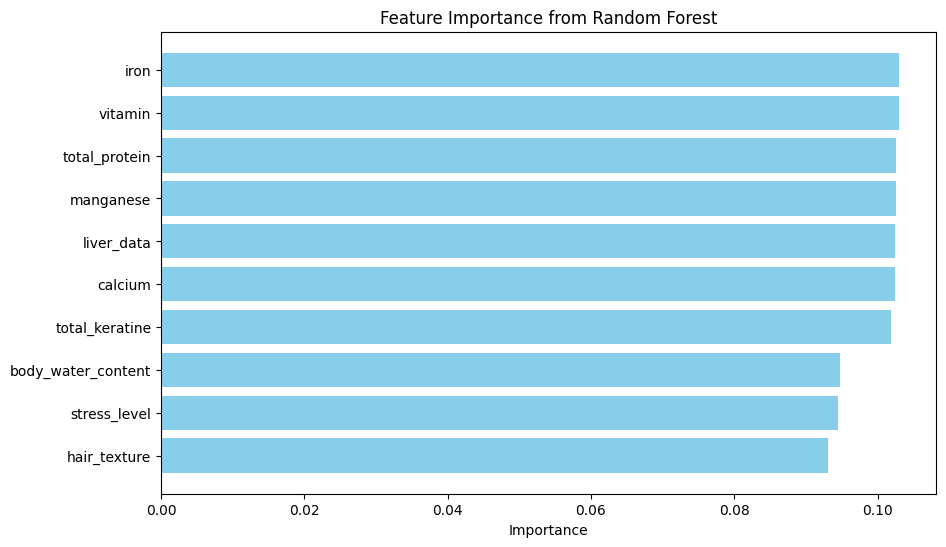

In [18]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  
plt.show()


In [42]:
y_pred=model1.predict(X_test1)
print(y_pred)

[2 1 5 ... 5 0 1]


In [48]:
print(X_filtered)
print(y)

       iron  vitamin  total_protein  manganese  liver_data  calcium  \
0        55      249            312         87         368      333   
1         1      425             52        387          41      182   
2        91      140            170        199          90      414   
3         3      358            256        120          65       35   
4       301      207            309        329         346      345   
...     ...      ...            ...        ...         ...      ...   
99995   260      209            440        473         281       12   
99996   159      352            311        194          30      391   
99997   278      185             27        376         110       96   
99998   157      250            450        287         156       81   
99999   164      440            464        110          12      356   

       total_keratine  
0                 100  
1                 207  
2                 197  
3                 334  
4                 185  
...

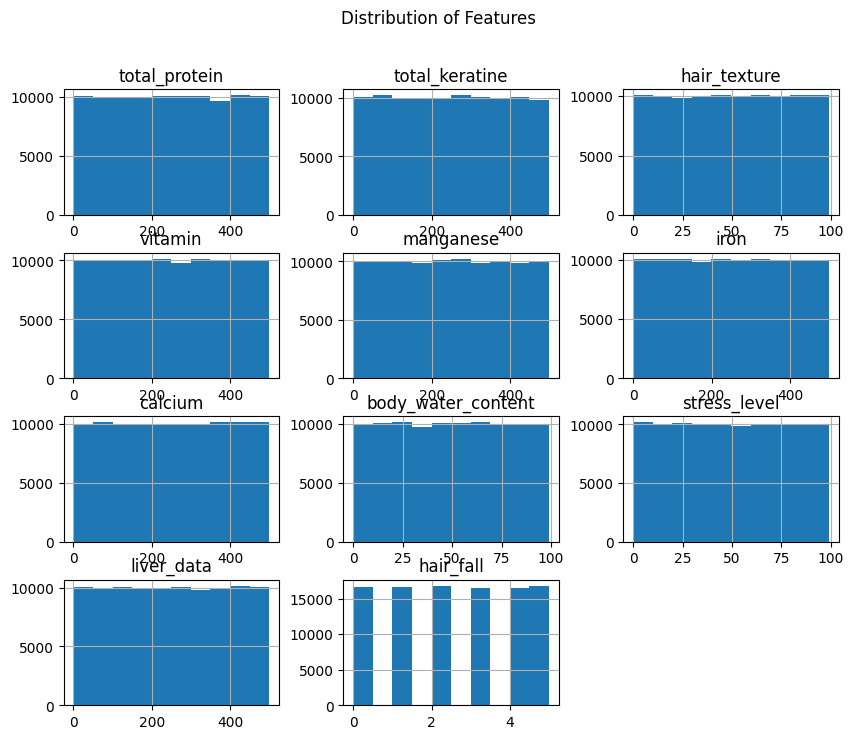

In [12]:
df.hist(bins=10, figsize=(10, 8))
plt.suptitle('Distribution of Features')
plt.show()

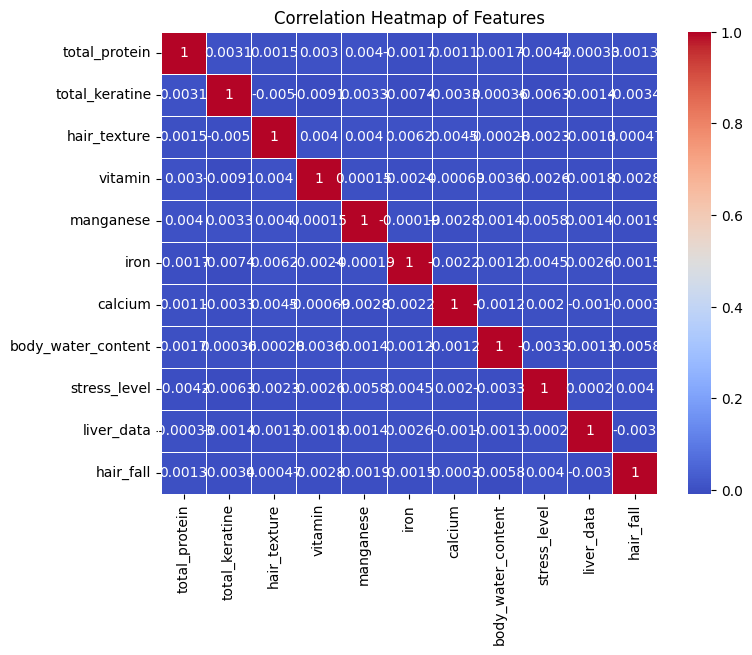

In [29]:
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [44]:
from sklearn.metrics import classification_report
report = classification_report(y_test1, y_pred)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.17      0.17      3348
           1       0.16      0.17      0.17      3317
           2       0.17      0.18      0.18      3296
           3       0.16      0.16      0.16      3328
           4       0.16      0.16      0.16      3345
           5       0.16      0.13      0.15      3366

    accuracy                           0.16     20000
   macro avg       0.16      0.16      0.16     20000
weighted avg       0.16      0.16      0.16     20000



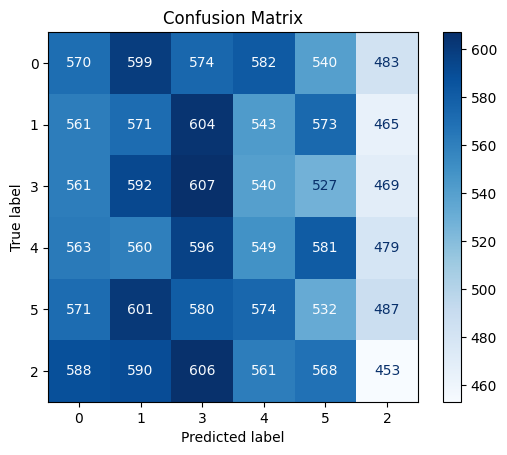

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = y_test1.unique()
cm = confusion_matrix(y_test1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [39]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt','log2',None],
    'bootstrap': [True, False],
}

random_search = RandomizedSearchCV(
    estimator=model1,
    param_distributions=param_distributions,
    n_iter=10,  
    cv=2,      
    random_state=42,  
)

random_search.fit(X_train1, y_train1)
best_model = random_search.best_estimator_
print(best_model)


RandomForestClassifier(bootstrap=False, max_depth=30, max_features=None,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)
